In [1]:
# Dependencies
import json
import csv
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
import requests


In [2]:
# Store filepath in a variable
file_one = "Resources/movies_metadata.csv"


In [3]:
# Read our Data file with the pandas library
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [4]:
# Show just the header
file_one_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,Adventure,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,NaN,16000000,Comedy,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
3,False,NaN,60000000,Action,NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818,170,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886
4,False,NaN,35000000,Action,NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174


In [5]:
# Delete extra columns:
reducedcolumns_df = file_one_df[["original_title", "release_date", "genres", "vote_average", "vote_count", "revenue"]]
reducedcolumns_df.head()

,original_title,release_date,genres,vote_average,vote_count,revenue
0,Toy Story,1995-10-30,Animation,7.7,5415,373554033
1,Jumanji,1995-12-15,Adventure,6.9,2413,262797249
2,Waiting to Exhale,1995-12-22,Comedy,6.1,34,81452156
3,Heat,1995-12-15,Action,7.7,1886,187436818
4,Sudden Death,1995-12-22,Action,5.5,174,64350171


In [6]:
# Show Record Count
reducedcolumns_df.count()

original_title    4493
release_date      4493
genres            4485
vote_average      4493
vote_count        4493
revenue           4493
dtype: int64

In [7]:
# Drop NA values and show dataframe
movies_data_df = reducedcolumns_df.dropna(how='any')

In [8]:
movies_data_df.count()

original_title    4485
release_date      4485
genres            4485
vote_average      4485
vote_count        4485
revenue           4485
dtype: int64

In [9]:
# Using .rename(columns={}) in order to rename columns
ren_movies_df = movies_data_df.rename(columns={"original_title":"Title", "release_date":"Release Date", "genres":"Genres",
                                               "vote_average": "Ratings", "vote_count":"Count of Votes", "revenue":"Revenue"})
ren_movies_df.head()

,Title,Release Date,Genres,Ratings,Count of Votes,Revenue
0,Toy Story,1995-10-30,Animation,7.7,5415,373554033
1,Jumanji,1995-12-15,Adventure,6.9,2413,262797249
2,Waiting to Exhale,1995-12-22,Comedy,6.1,34,81452156
3,Heat,1995-12-15,Action,7.7,1886,187436818
4,Sudden Death,1995-12-22,Action,5.5,174,64350171


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
ren_movies_df.to_csv("Output/MoviesInfo.csv", index=False, header=True)

In [ ]:
# Get datatype of Count of Votes column:
ren_movies_df["Count of Votes"].head()

0    5415
1    2413
2      34
3    1886
4     174
Name: Count of Votes, dtype: int64

In [ ]:
# Calculate the average (mean) count of votes:
average_vote_count = round(ren_movies_df["Count of Votes"].mean(),0)
print(f"Average count of votes per movie is {average_vote_count}")

Average count of votes per movie is 841.0


In [ ]:
# Calculate the average (mean) revenue:
average_revenue = round(ren_movies_df["Revenue"].mean(),2)
print(f"Average revenue per movie is {average_revenue}")

Average revenue per movie is 104567586.21


In [ ]:
# Calculate the average of ratings:
ren_movies_df["Ratings"]=pd.to_numeric(ren_movies_df["Ratings"])
average_rating = round(ren_movies_df["Ratings"].mean(),0)
print(f"Average rating is {average_rating}")

Average rating is 6.0


In [ ]:
# Print average revenue analysis based on count of votes and ratings
print(f"From the dataset, we see that a movie with a rating of {average_rating} and {average_vote_count} votes earns a revenue of about ${average_revenue}")

From the dataset, we see that a movie with a rating of 6.0 and 841.0 votes earns a revenue of about $104567586.21


In [27]:
# Get average Box Office Revenue by Genre category and identify which genre earns the highest revenue:
avg_rev_gen = round(ren_movies_df.groupby(["Genres"])["Revenue"].mean(),2)
avg_rev_gen_df = pd.DataFrame(avg_rev_gen)

avg_rev_gen_df = avg_rev_gen_df.sort_values("Revenue", ascending=False)

In [28]:
# Export file as a CSV, with index and header
avg_rev_gen_df.to_csv("Output/RevperGenre.csv", index=True, header=True)

In [29]:
avg_rev_gen_df

,Revenue
Genres,
Animation,2.688670e+08
Family,2.495455e+08
Adventure,2.178269e+08
Science Fiction,1.837745e+08
Fantasy,1.523024e+08
Action,1.386894e+08
Romance,8.627714e+07
Thriller,8.583876e+07
History,7.630525e+07


In [ ]:
# Print Box office revenue analysis per Genre
print(f"From the dataset we observe that Genre 'Animation' earns the highest revenue,followed by 'Family' and 'Adventure'")
print(f"while Genres 'Foreign' and 'Documentary' are on the lower side of the earnings.")

From the dataset we observe that Genre 'Animation' earns the highest revenue,followed by 'Family' and 'Adventure'
while Genres 'Foreign' and 'Documentary' are on the lower side of the earnings.


In [17]:
# Get average vote count per Genre and provide analysis:
avg_rev_vot = round(ren_movies_df.groupby(["Genres"])["Count of Votes"].mean(),0)
avg_rev_vot_df = pd.DataFrame(avg_rev_vot)

avg_rev_vot_df = avg_rev_vot_df.sort_values("Count of Votes", ascending=False)

avg_rev_vot_df

,Count of Votes
Genres,
Science Fiction,1742.0
Adventure,1497.0
Animation,1490.0
Family,1198.0
Fantasy,1124.0
Action,1108.0
Thriller,897.0
Mystery,772.0
War,720.0


In [25]:
# Export file as a CSV, with index and header
avg_rev_vot_df.to_csv("Output/VoteCountperGenre.csv", index=True, header=True)

In [19]:
# Get ratings per Genre and provide analysis:
avg_rev_rate = round(ren_movies_df.groupby(["Genres"])["Ratings"].mean(),0)
avg_rev_rate_df = pd.DataFrame(avg_rev_rate)

avg_rev_rate_df = avg_rev_rate_df.sort_values("Ratings", ascending=False)
avg_rev_rate_df

,Ratings
Genres,
History,7.0
Documentary,7.0
War,7.0
Drama,7.0
Western,7.0
Crime,7.0
Comedy,6.0
Family,6.0
Fantasy,6.0


In [24]:
# Export file as a CSV, wit index and header
avg_rev_rate_df.to_csv("Output/RatingperGenre.csv", index=True, header=True)

In [21]:
# Get average Box Office Revenue by Count of Votes category and provide analysis:
avg_movi_rate = round(ren_movies_df.groupby(["Ratings"])["Count of Votes"].mean(),0)
avg_movi_rate_df = pd.DataFrame(avg_movi_rate)

avg_movi_rate_df = avg_movi_rate_df.sort_values("Count of Votes", ascending=False)
avg_movi_rate_df

,Count of Votes
Ratings,
8.3,6032.0
8.5,4795.0
8.1,4568.0
7.9,3421.0
8.0,3044.0
...,...
3.4,22.0
8.6,6.0
2.0,4.0


In [23]:
# Export file as a CSV, with index and header
avg_movi_rate_df.to_csv("Output/VoteCountwithratings.csv", index=True, header=True)

In [ ]:
ren_movies_df

,Title,Release Date,Genres,Ratings,Count of Votes,Revenue
0,Toy Story,1995-10-30,Animation,7.7,5415,373554033
1,Jumanji,1995-12-15,Adventure,6.9,2413,262797249
2,Waiting to Exhale,1995-12-22,Comedy,6.1,34,81452156
3,Heat,1995-12-15,Action,7.7,1886,187436818
4,Sudden Death,1995-12-22,Action,5.5,174,64350171
...,...,...,...,...,...,...
4488,Transformers: The Last Knight,2017-06-21,Action,6.2,1440,604942143
4489,The Dark Tower,2017-08-03,Action,5.7,688,71000000
4490,The Emoji Movie,2017-07-28,Comedy,5.8,327,66913939
4491,Wind River,2017-08-03,Action,7.4,181,184770205


In [ ]:
# Check if movie revenue and rating are correlated:
boxoff_rev = ren_movies_df.iloc[:,5]
movie_rating = ren_movies_df.iloc[:,3]
correlation = st.pearsonr(boxoff_rev,movie_rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.2


The correlation between both factors is 0.2


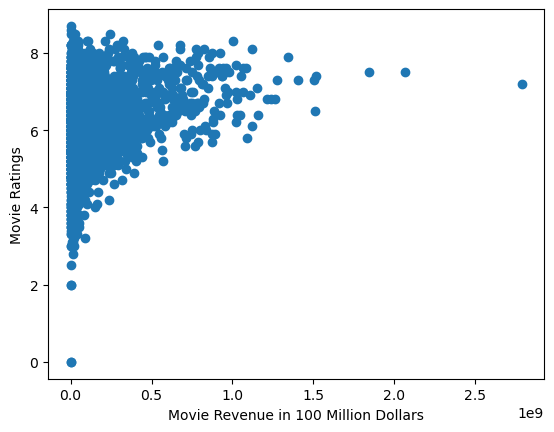

In [ ]:
# Compare the calculated Pearson's r to the plots
plt.scatter(boxoff_rev,movie_rating)
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Movie Ratings')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
# Movie Revenue vs Movie Rating Analysis:
print(f"The value of correlation is 0.2 which indicates weak correlation between movie's revenue and its ratings.")

The value of correlation is 0.2 which indicates weak correlation between movie's revenue and its ratings.


Regression line equation is: y = 0.0 x + 6.16
The r-squared is: 0.19551033792598516
The regression shows a positive correlation.
Movie's revenue has weak correlation to its ratings.


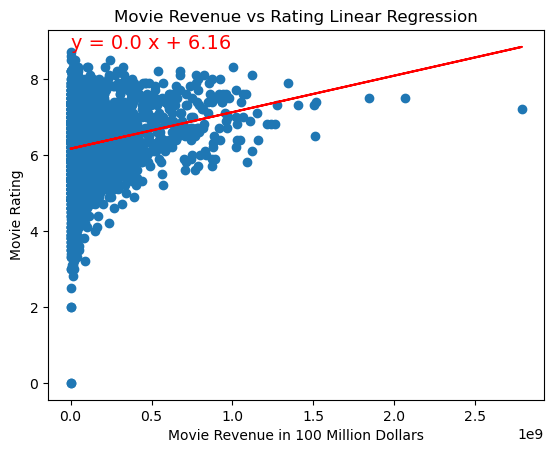

In [ ]:
# Linear regression on Movie Revenue vs Count of Votes
(slope, intercept, rvalue, pvalue, stderr) = linregress(boxoff_rev, movie_rating)
regress_values = boxoff_rev * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(boxoff_rev,movie_rating)
plt.plot(boxoff_rev,regress_values,color='red')
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Movie Rating')
plt.annotate(line_eq,(2,8.8),fontsize=14,color='red')
plt.title('Movie Revenue vs Rating Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a positive correlation.")
print("Movie's revenue has weak correlation to its ratings.")
plt.show()

In [ ]:
# Check if movie revenue and count of votes are correlated:
boxoff_rev = ren_movies_df.iloc[:,5]
votes_count = ren_movies_df.iloc[:,4]
correlation = st.pearsonr(boxoff_rev, votes_count)
print(f"The correlation between a movie's revenue and the votes it earns is {round(correlation[0],2)}")

The correlation between a movie's revenue and the votes it earns is 0.77


In [ ]:
# Movie Revenue vs Count of Votes the movie received analysis:
print(f"The value of pearson correlation is around 0.7 which indicates moderate positive correlation between movie's revenue and its votes counts.")

The value of pearson correlation is around 0.7 which indicates moderate positive correlation between movie's revenue and its votes counts.


The correlation between both factors is 0.77


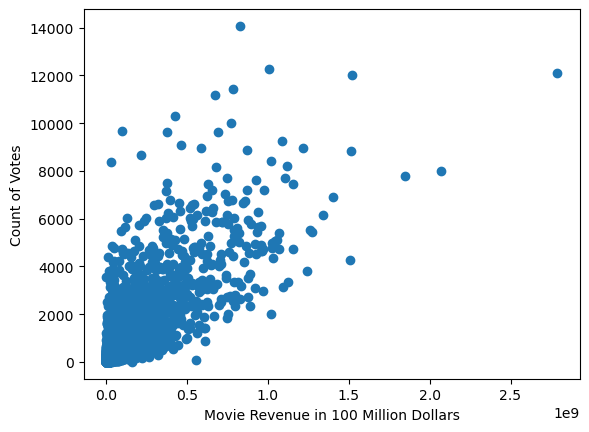

In [ ]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(boxoff_rev,votes_count)
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Count of Votes')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Regression line equation is: y = 0.0 x + 240.62
The r-squared is: 0.7666999298375368
The regression shows a moderate positive correlation.


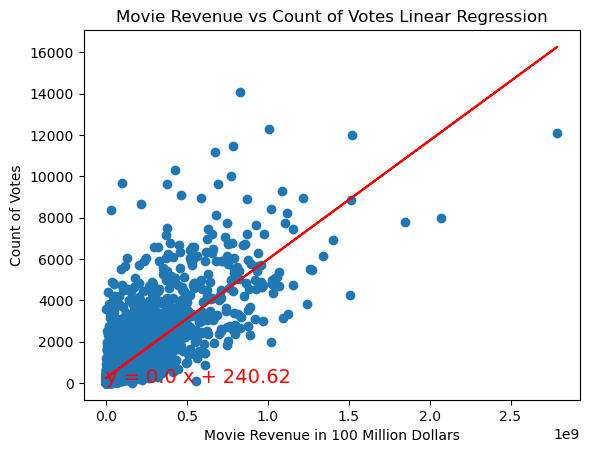

In [ ]:
# Linear regression on Movie Revenue vs Count of Votes
(slope, intercept, rvalue, pvalue, stderr) = linregress(boxoff_rev, votes_count)
regress_values = boxoff_rev * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(boxoff_rev,votes_count)
plt.plot(boxoff_rev,regress_values,color='red')
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Count of Votes')
plt.annotate(line_eq,(2,2.2),fontsize=14,color='red')
plt.title('Movie Revenue vs Count of Votes Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a moderate positive correlation.")
plt.show()

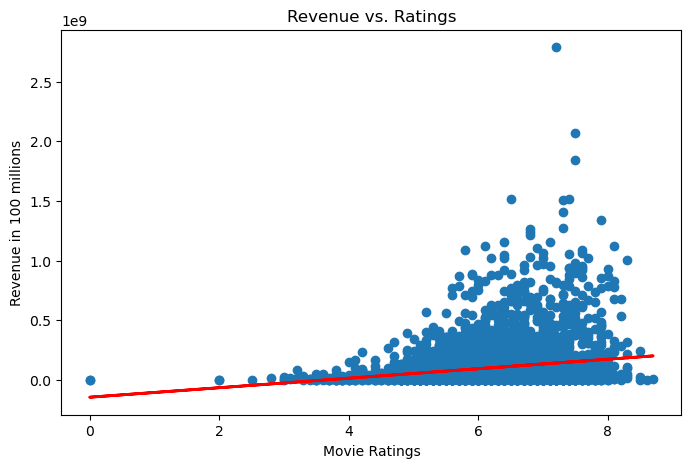

In [ ]:
# Plot scatter plot to analyze movie's revenue and the ratings

plt.figure(figsize=(8, 5))
plt.scatter(ren_movies_df["Ratings"], ren_movies_df["Revenue"])
plt.xlabel("Movie Ratings")
plt.ylabel("Revenue in 100 millions")
plt.title("Revenue vs. Ratings")

# Create regression line 
slope, intercept, rvalue, pvalue, stderr = linregress(
    ren_movies_df["Ratings"], ren_movies_df["Revenue"])
regress_values = ren_movies_df["Ratings"] * slope + intercept
plt.plot(ren_movies_df["Ratings"], regress_values, color="red", linewidth=2)
plt.show()

Text(0.5, 1.0, 'Count of Votes vs. Movie Ratings')

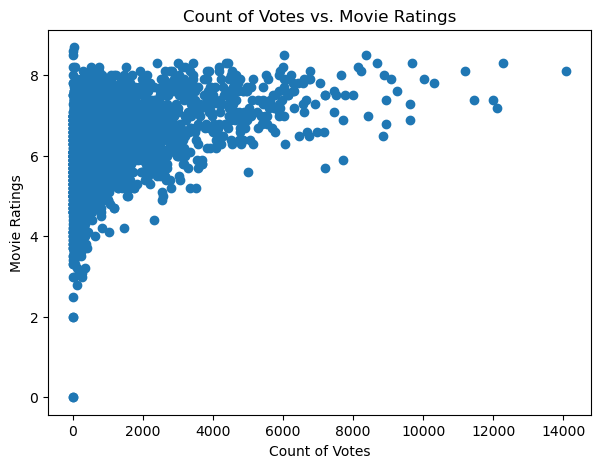

In [ ]:
# Create scatter plot to analyze the count of votes and movie ratings
plt.figure(figsize=(7, 5))
plt.scatter(ren_movies_df["Count of Votes"], ren_movies_df["Ratings"])
plt.xlabel("Count of Votes")
plt.ylabel("Movie Ratings")
plt.title("Count of Votes vs. Movie Ratings")

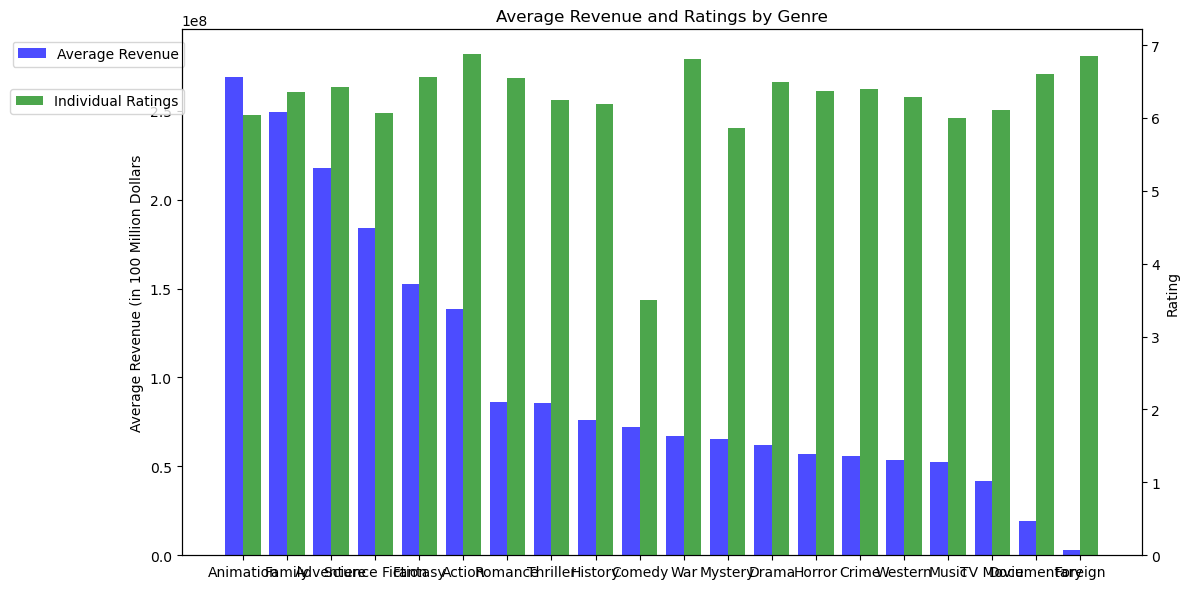

In [ ]:
# Calculate average revenue per Genre:

avg_revenue_data = ren_movies_df.groupby("Genres")["Revenue"].mean()
avg_revenue_data = avg_revenue_data.sort_values(ascending=False)

# Create a grouped bar chart for average revenue and ratings by genre
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average revenue
bar_width = 0.4
index = range(len(avg_revenue_data))
revenue_bars = ax1.bar(index, avg_revenue_data, bar_width, label="Average Revenue", alpha=0.7, color='b')

# Add a second y-axis for ratings
ax2 = ax1.twinx()
rating_bars = ax2.bar([i + bar_width for i in index], ren_movies_df.groupby("Genres")["Ratings"].mean(), bar_width, label="Individual Ratings", alpha=0.7, color='g')

# Set labels & titles
plt.xlabel("Genres")
ax1.set_ylabel("Average Revenue (in 100 Million Dollars")
ax2.set_ylabel("Rating")
plt.title("Average Revenue and Ratings by Genre")

# Set y-axis limits for revenue to accommodate the actual data range
ax1.set_ylim(0, max(avg_revenue_data) * 1.1)

# Set x-axis labels 
plt.xticks([i + bar_width/2 for i in index], avg_revenue_data.index, rotation=90, ha='right')


ax1.legend(loc='best', bbox_to_anchor=(0.01, 0.99))
ax2.legend(loc='best', bbox_to_anchor=(0.01, 0.90))

plt.tight_layout()
plt.show()


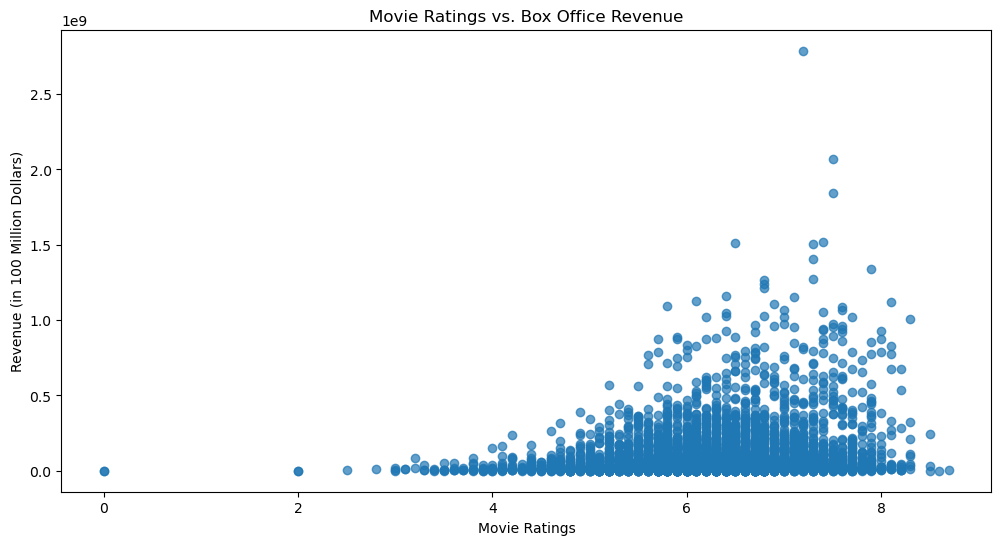

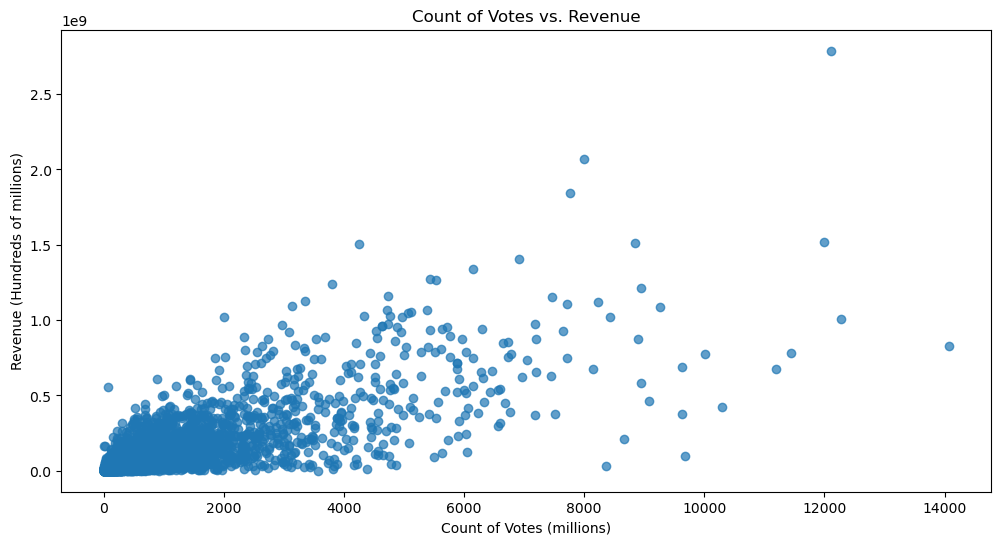

In [ ]:
# Scatter plot for movie ratings vs. revenue
plt.figure(figsize=(12, 6))
plt.scatter(ren_movies_df["Ratings"], ren_movies_df["Revenue"], alpha=0.7)
plt.xlabel("Movie Ratings")
plt.ylabel("Revenue (in 100 Million Dollars)")
plt.title("Movie Ratings vs. Box Office Revenue")
plt.show()

# Scatter plot for count of votes vs. revenue
plt.figure(figsize=(12, 6))
plt.scatter(ren_movies_df["Count of Votes"], ren_movies_df["Revenue"], alpha=0.7)
plt.xlabel("Count of Votes (millions)")
plt.ylabel("Revenue (Hundreds of millions)")
plt.title("Count of Votes vs. Revenue")
plt.show()

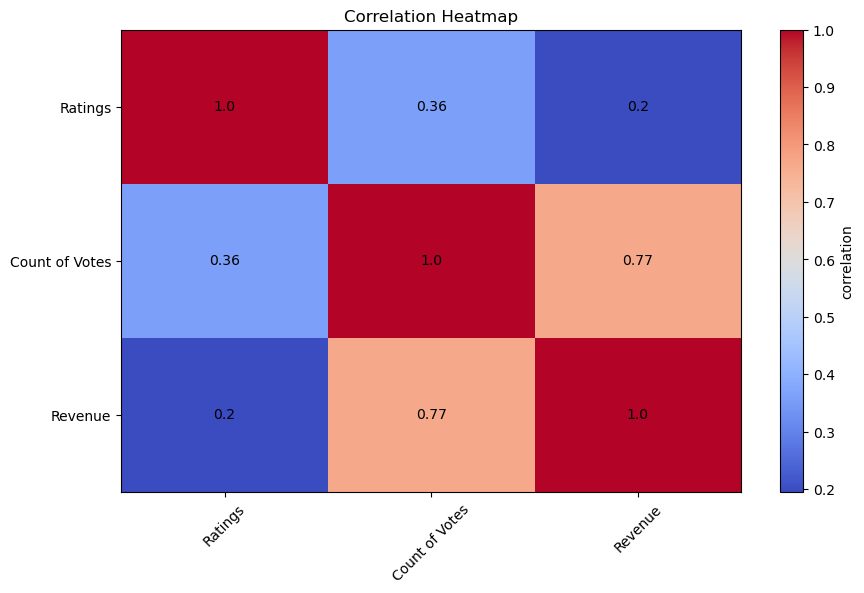

In [ ]:
correlation_matrix = ren_movies_df[["Ratings", "Count of Votes", "Revenue"]].corr()
plt.figure(figsize=(10,6))
heatmap_rev = plt.imshow(correlation_matrix, cmap="coolwarm", aspect="auto")
plt.colorbar(heatmap_rev, label="correlation")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                        ha='center', va='center', color='black')
        
plt.title("Correlation Heatmap")
plt.show()

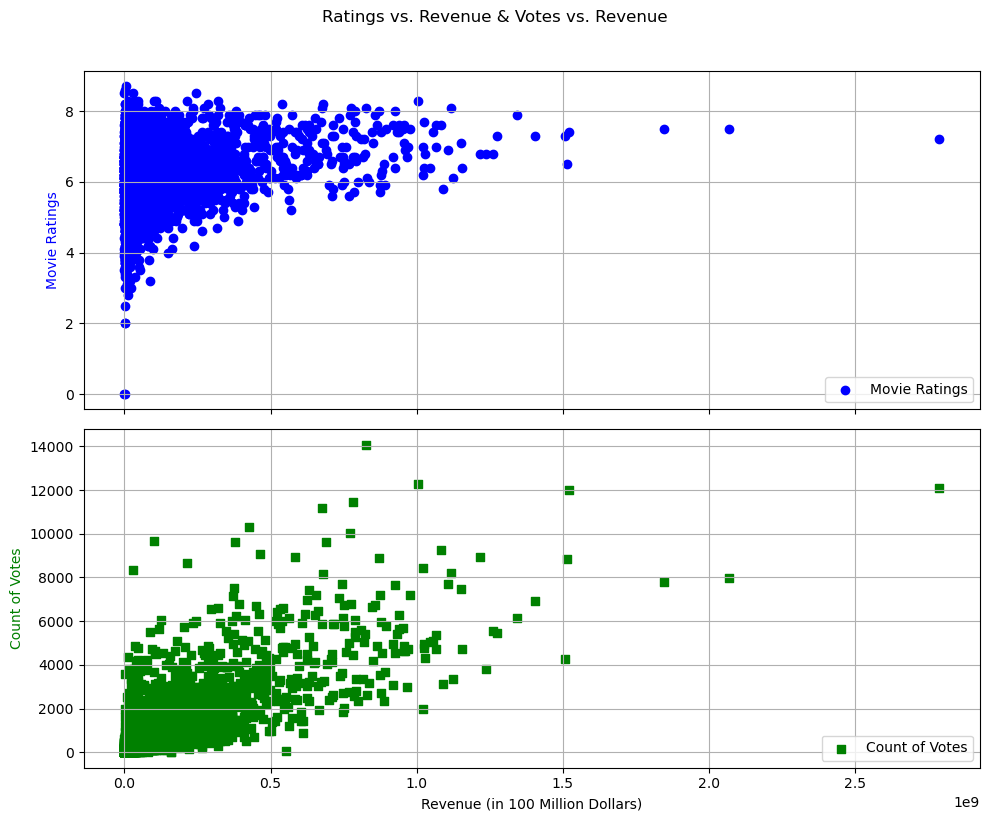

In [ ]:
# Data
ratings = ren_movies_df["Ratings"]
revenue = ren_movies_df["Revenue"]
votes = ren_movies_df["Count of Votes"]

# Create separate line charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Line chart for movie ratings vs. revenue
ax1.scatter(revenue, ratings, label="Movie Ratings", color="b", marker="o")
ax1.set_ylabel("Movie Ratings", color="b")
ax1.legend(loc="lower right")
ax1.grid(True)

# Line chart for count of votes vs. revenue
ax2.scatter(revenue, votes, label="Count of Votes", color="g", marker="s")
ax2.set_xlabel("Revenue (in 100 Million Dollars)")
ax2.set_ylabel("Count of Votes", color="g")
ax2.legend(loc="lower right")
ax2.grid(True)

# Add a title
plt.suptitle("Ratings vs. Revenue & Votes vs. Revenue", y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Null Hypothesis: There is no correlation between a movie's revenue and its ratings or count of votes
# Alternate Hypothesis: Count of votes and movie's ratings contribute to movie's revenue and success

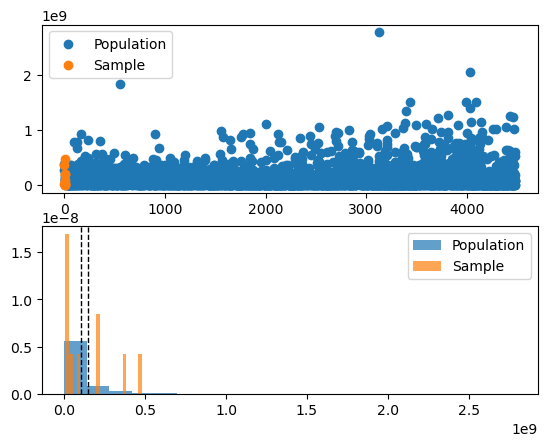

In [ ]:
# Perform one t-test:
sample = ren_movies_df['Revenue'].sample(n=10, random_state=42)
population = ren_movies_df['Revenue']

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population)), population, label="Population")
plt.scatter(range(len(sample)), sample, label="Sample")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  


In [ ]:
st.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-3.4723648209376736, pvalue=0.007022539912102872)